# Porazdelitev

In [16]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [17]:
data = np.loadtxt ('../ratingSAMPLE.csv', delimiter=",", skiprows=0)

Graf da osnovno idejo o tem, kaj uporabiti

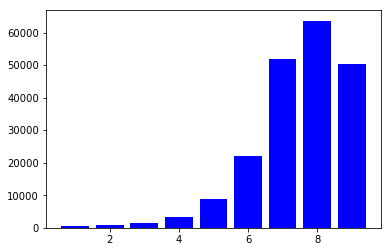

In [6]:
ratingsNum=list()
for number in np.arange(1,10):
    ratingsNum.append(len(data[data[:,2]==number,2]))

plt.figure()
plt.bar(np.arange(1,10),ratingsNum, 0.8, color="blue")
plt.show()

Ker imamo vnaprej dolečen interval, ki ne ustreza Gaussu najbolje, sem se odločil uporabiti beta porazdelitev

In [21]:
from scipy.stats import beta

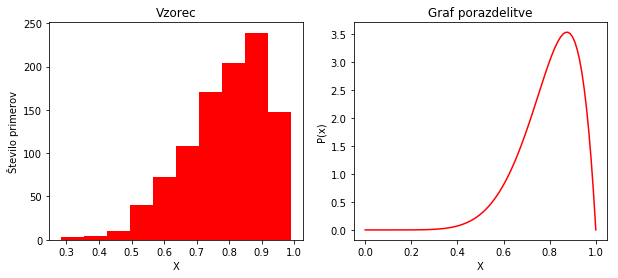

In [63]:
a=8
b=2
n=1000

sample=beta.rvs(a, b, size=n)

xr = np.linspace(0, 1, 100)# interval X 
P  = [beta.pdf(x, a, b) for x in xr]  # porazdelitvena funkcija

# Histogram - porazdelitev naključlnih VZORCEV x glede na P(x)


plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("Vzorec")
plt.hist(sample, color="red")
plt.xlabel("X")
plt.ylabel("Število primerov")

# Graf porazdelitvene funkcije
plt.subplot(1, 2, 2)
plt.title("Graf porazdelitve")
plt.plot(xr, P, color="red")   # nariši P(x)
plt.ylabel("P(x)")
plt.xlabel("X")
plt.show()

Primerjava

C:\Users\Sniper43\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:407: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*sqrt(a + b + 1) / (a + b + 2) / sqrt(a*b)


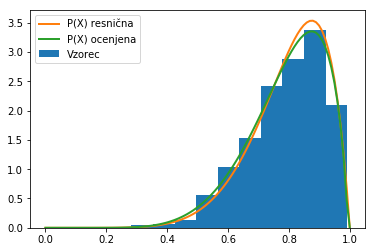

In [64]:
parameters = beta.fit(sample)
P_fit = [beta.pdf(x, *parameters) for x in xr ]

plt.figure()
plt.hist(sample,    label="Vzorec", normed=True)
plt.plot(xr, P,     label="P(X) resnična", linewidth=2.0)
plt.plot(xr, P_fit, label="P(X) ocenjena", linewidth=2.0)   # ocenjena porazdelitev je model
plt.legend()
plt.show()

Prileganje smo določili za zadovoljivo natančno